In [13]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
import seaborn as sns

ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


In [14]:
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'
ssl = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)
waveforms = ssl.load_spike_sorting_object('waveforms')  # loads in the template waveforms

<Axes: >

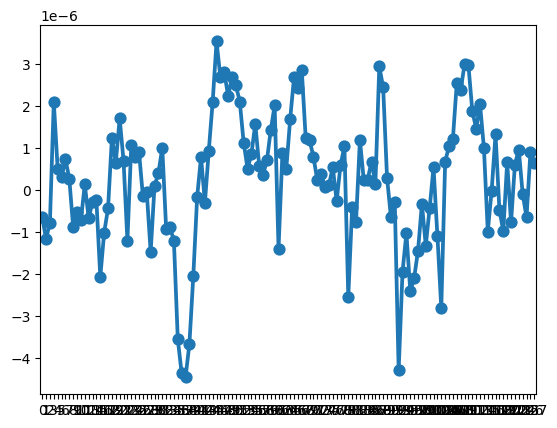

In [29]:
sns.pointplot(waveforms['templates'][5][10])

In [ ]:
sessions = one.search()
sessions[0]

UUID('c3f58136-2198-4a39-bde0-e2a8cf112a56')

In [7]:
# this is the query that yields the few recordings for the Rhomboid Nucleus (RH) region
insertions_rh = one.search_insertions(atlas_acronym='RH', datasets='spikes.times.npy', project='brainwide')

# if we want to extend the search to all thalamic regions, we can do the following
insertions_th = one.search_insertions(atlas_acronym='TH', datasets='spikes.times.npy', project='brainwide')

# the Allen brain regions parcellation is hierarchical, and searching for Thalamus will return all child Rhomboid Nucleus (RH) regions
assert set(insertions_rh).issubset(set(insertions_th))

In [8]:
sessions_with_spikes = one.search(project='brainwide', datasets='spikes.times.npy')


In [9]:
tags = {t['name']: t['description'] for t in one.alyx.rest('tags', 'list') if t['public']}
for key, value in tags.items():
    print(f"{key}\n{value}\n")

2021_Q1_IBL_et_al_Behaviour
https://doi.org/10.7554/eLife.63711

2021_Q2_PreRelease
https://figshare.com/articles/online_resource/Spike_sorting_pipeline_for_the_International_Brain_Laboratory/19705522/3

2021_Q2_Varol_et_al
https://doi.org/10.1109/ICASSP39728.2021.9414145

2021_Q3_Whiteway_et_al
https://doi.org/10.1371/journal.pcbi.1009439

2022_Q2_IBL_et_al_RepeatedSite
https://doi.org/10.1101/2022.05.09.491042

2022_Q3_IBL_et_al_DAWG
https://doi.org/10.1101/827873

2022_Q4_IBL_et_al_BWM
https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815

2023_Q1_Biderman_Whiteway_et_al


2023_Q1_Mohammadi_et_al


2023_Q3_Findling_Hubert_et_al
https://doi.org/10.1101/2023.07.04.547684

2023_Q4_Bruijns_et_al


2023_Q4_IBL_et_al_BWM_2


2023_Q4_IBL_et_al_BWM_passive


2024_Q2_Blau_et_al


2024_Q2_IBL_et_al_BWM_iblsort
Spike sorting output with ibl-sorter 1.7.0 for BWM

2024_Q2_IBL_et_al_RepeatedSite
https://doi.org/10.1101/2022.05.09.491042

2024_Q3_Pan_Vazquez_et_al


In [ ]:
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'
ssl = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)
waveforms = ssl.load_spike_sorting_object('waveforms')  # loads in the template waveforms